# LINEAR AND NON-LINEAR MODELS

#### Importing The Neccessary Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Sample Linear Regression Models With Their Graphs

<function matplotlib.pyplot.show(*args, **kw)>

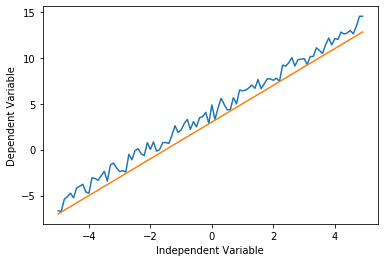

In [32]:
x = np.arange(-5.0, 5.0, 0.1)
y = 2*(x) + 3 
y_noise = 2* np.random.rand(x.size)
y_data = y + y_noise
plt.plot(x, y_data)
plt.plot(x,y)
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

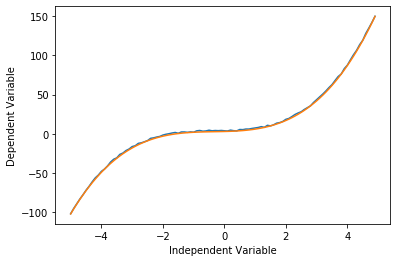

In [27]:
x = np.arange(-5.0, 5.0, 0.1)
y = 1*(x**3) + 1*(x**2) + 1*x + 3 
y_noise = 2* np.random.rand(x.size)
y_data = y + y_noise
plt.plot(x, y_data)
plt.plot(x,y)
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

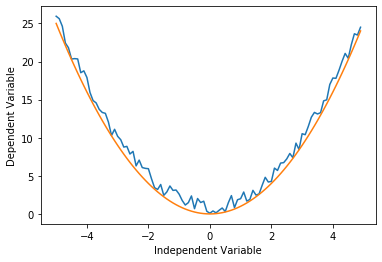

In [28]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.power(x,2) 
y_noise = 2* np.random.rand(x.size)
y_data = y + y_noise
plt.plot(x, y_data)
plt.plot(x,y)
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

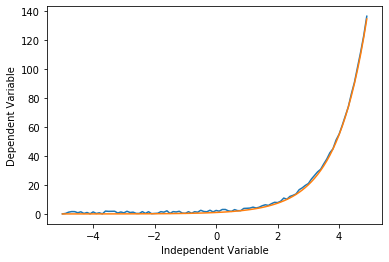

In [29]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.exp(x)
y_noise = 2* np.random.rand(x.size)
y_data = y + y_noise
plt.plot(x, y_data)
plt.plot(x,y)
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.show

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


<function matplotlib.pyplot.show(*args, **kw)>

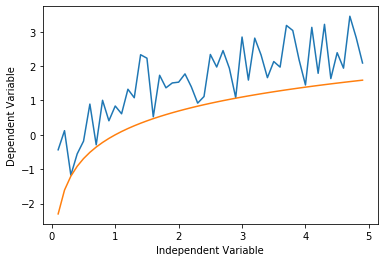

In [30]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.log(x)
y_noise = 2* np.random.rand(x.size)
y_data = y + y_noise
plt.plot(x, y_data)
plt.plot(x,y)
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

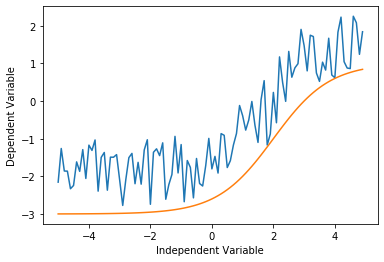

In [31]:
x = np.arange(-5.0, 5.0, 0.1)
y = 1 - 4 / (1 + np.power(3, x-2))
y_noise = 2* np.random.rand(x.size)
y_data = y + y_noise
plt.plot(x, y_data)
plt.plot(x,y)
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.show

## Non-Linear Models

In [34]:
#downloading dataset
data = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv")
data.head(5)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


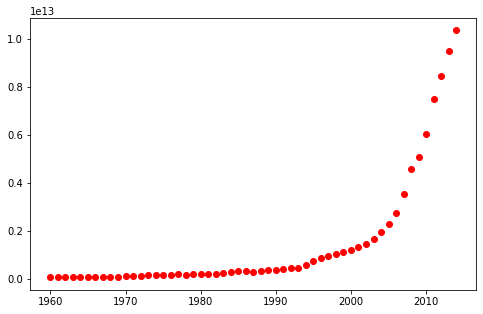

In [54]:
plt.figure(figsize = (8,5))
xd , yd = (data.iloc[:,0], data.iloc[:,1])
plt.plot(xd, yd, "ro")
plt.show()

## Finding the best model for the data

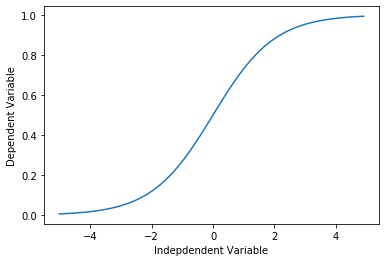

In [55]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [56]:
def model(x, beta1, beta2):
    y = 1.0 / (1.0 + np.exp(-beta1 * (x - beta2)))
    return y

In [57]:
beta1 = 0.10
beta2 = 1990.0

ypred = model(xd, beta1, beta2)


In [58]:
ypred.head()

0    0.047426
1    0.052154
2    0.057324
3    0.062973
4    0.069138
Name: Year, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

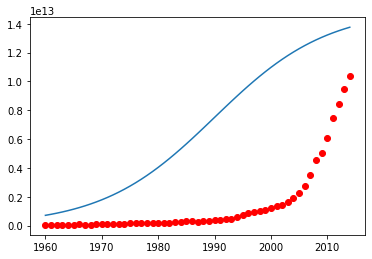

In [59]:
plt.plot(xd, ypred*15000000000000.)
plt.plot(xd, yd, 'ro')
plt.show

In [60]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(model, xd, yd)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 1.000000, beta_2 = 1.000000


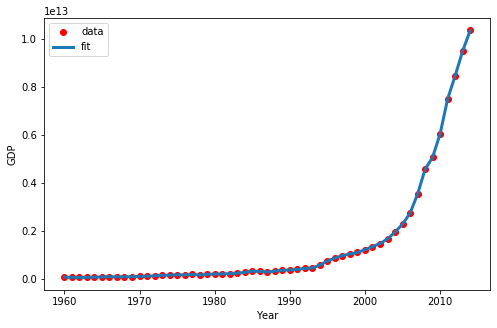

In [64]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = model(xd, *popt)
plt.plot(xd, yd, 'ro', label='data')
plt.plot(xd,yd, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## Finding the accuracy of the model

In [67]:
   
# split data into train/test
msk = np.random.rand(len(data)) < 0.8
train_x = xd[msk]
test_x = xd[~msk]
train_y = yd[msk]
test_y = yd[~msk]

# build the model using train set
popt, pcov = curve_fit(model, train_x, train_y)

# predict using test set
y_hat = model(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )


Mean absolute error: 2164855034710.55
Residual sum of squares (MSE): 21457071463827270556188672.00
R2-score: 0.00


C:\Users\Administrator\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
